In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.over_sampling import SMOTE

le = LabelEncoder()
cnn = CondensedNearestNeighbour()
sm = SMOTE()
mm = RobustScaler()

In [142]:
# load csv data
df = pd.read_csv('data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [144]:
# Counting the number of missing data for each column
for column in df.columns:
    print(f'{column:20}: Num_NA = {df.loc[:, column].isna().sum()}')

Loan_ID             : Num_NA = 0
Gender              : Num_NA = 13
Married             : Num_NA = 3
Dependents          : Num_NA = 15
Education           : Num_NA = 0
Self_Employed       : Num_NA = 32
ApplicantIncome     : Num_NA = 0
CoapplicantIncome   : Num_NA = 0
LoanAmount          : Num_NA = 22
Loan_Amount_Term    : Num_NA = 14
Credit_History      : Num_NA = 50
Property_Area       : Num_NA = 0
Loan_Status         : Num_NA = 0


In [145]:
df.dropna(axis = 0, inplace = True)
y = df['Loan_Status']
X = df.drop(['Loan_ID', 'Loan_Status'], axis = 1)

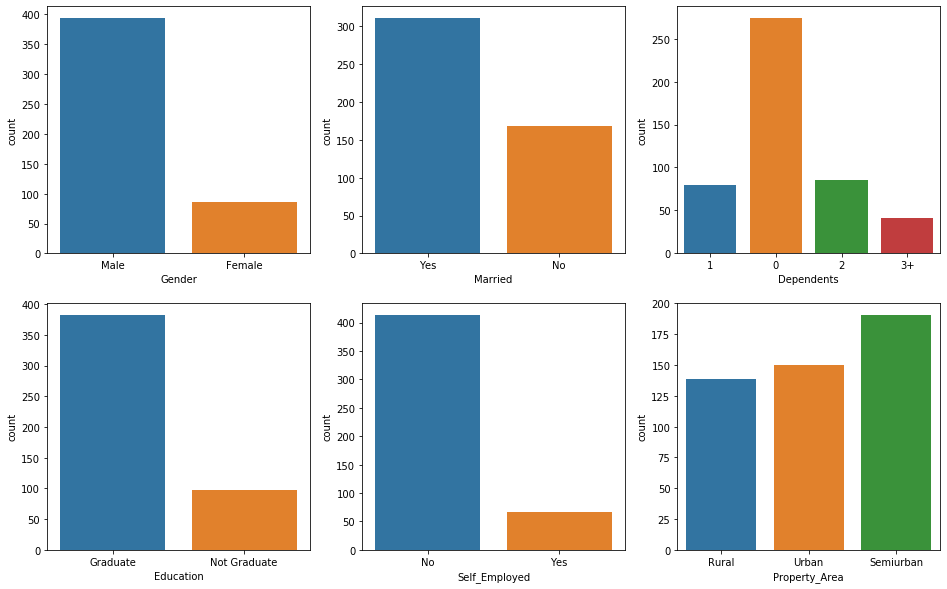

In [146]:
rows = 2
cols = 3
plt.figure(figsize = (16,10))
for i, column in enumerate(X.select_dtypes(['object']).columns):
    plt.subplot(rows, cols, i+1)
    sns.countplot(column, data = X)

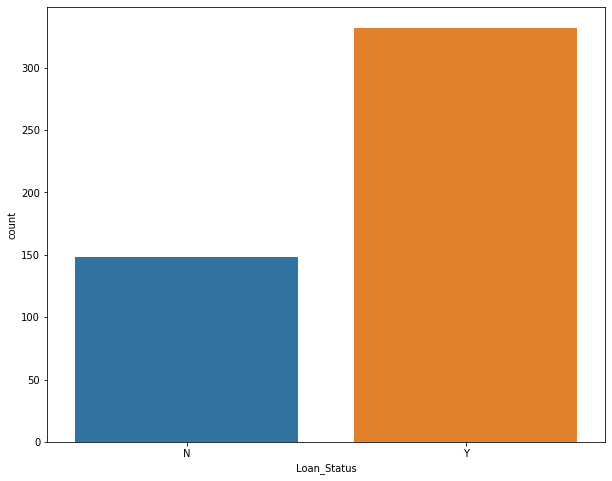

In [156]:
plt.figure(figsize = (10, 8))
sns.countplot(df['Loan_Status'])
plt.show()

We can see that Loan_Status is highly imbalanced.

In [147]:
for col in X.select_dtypes(['int64', 'float64']).columns:
    X[col] = mm.fit_transform(np.array(X[col]).reshape(-1, 1))

for col in X.select_dtypes('object').columns:
    X[col] = le.fit_transform(X[col])
y = le.fit_transform(y)  # N:0, Y:1

## Imbalanced Data

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 12)

In [149]:
model = LogisticRegressionCV(cv = 5, max_iter=1e4)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55        14
           1       0.80      0.94      0.86        34

    accuracy                           0.79        48
   macro avg       0.78      0.68      0.71        48
weighted avg       0.79      0.79      0.77        48



In [150]:
model = RandomForestClassifier(n_jobs=-1, criterion='entropy', max_depth=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.50      0.61        14
           1       0.82      0.94      0.88        34

    accuracy                           0.81        48
   macro avg       0.80      0.72      0.74        48
weighted avg       0.81      0.81      0.80        48



In [151]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.84      0.94      0.89        34

    accuracy                           0.83        48
   macro avg       0.82      0.76      0.78        48
weighted avg       0.83      0.83      0.82        48



## Balanced Data

We will be performining an over-sampling

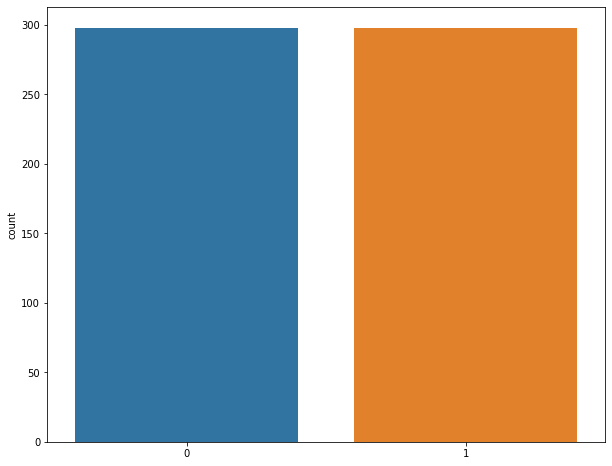

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 12)
X_train, y_train = sm.fit_resample(X_train, y_train)    

plt.figure(figsize = (10, 8))
sns.countplot(y_train)
plt.show()

 Now that the data is balanced, we can see how much of an improvement is made

In [153]:
model = LogisticRegressionCV(cv = 5, max_iter=1e4)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.54      0.50      0.52        14
           1       0.80      0.82      0.81        34

    accuracy                           0.73        48
   macro avg       0.67      0.66      0.67        48
weighted avg       0.72      0.73      0.73        48



In [154]:
model = RandomForestClassifier(n_jobs=-1, criterion='entropy', max_depth=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.50      0.61        14
           1       0.82      0.94      0.88        34

    accuracy                           0.81        48
   macro avg       0.80      0.72      0.74        48
weighted avg       0.81      0.81      0.80        48



In [155]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.69      0.64      0.67        14
           1       0.86      0.88      0.87        34

    accuracy                           0.81        48
   macro avg       0.77      0.76      0.77        48
weighted avg       0.81      0.81      0.81        48



# Conclusion


## LogisticRegressionCV
Recall for class 0 increased from 0.43 to 0.50, while recall for class 1 fell from 0.94 to 0.82 when using a SMOTE balanced dataset.

Precision for class 0 fell from 0.75 to 0.54.


## RandomForestClassfier
Precision and recall for both classes did not seem to be affected.

## GradientBoostingClassifier
Best performing classifier.

Recall increased from 0.57 to 0.67 for class 0, while recall fell from 0.94 to 0.87 for class 1.



